<a href="https://colab.research.google.com/github/Prateek-Bhardwaj/Machine-Learning-Projects/blob/main/Food101_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Beginning
In this notebook we'll build a deep learning model for food101 dataset using convolutional neural network(CNN). For more info regarding food101 dataset you can refer https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(train_data,valid_data), ds_info = tfds.load(name="food101",split=["train","validation"],shuffle_files=True,as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteFDNI9W/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteFDNI9W/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


### Visualising Data
WE've downloaded data from tensorflow datasets which is very helpful place to find ready to use data which is already in tensor format. So, now in this column we'll visualise the data the we get from dataset. 
Things we'll visualize will be-
* Shape of input data(in tensors)
* Datatype of input data
* Some idea about Label
* Are label and data properly aligned?

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# extrating names of different classes from dataset
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
single_data = train_data.take(1)

In [ ]:
for image, label in single_data:
  print(f"""
  Shape of image : {image.shape}
  Datatype of image: {image.dtype}
  Label of image: {label}
  class name for image: {class_names[label.numpy()]}
  """)


  Shape of image : (512, 512, 3)
  Datatype of image: <dtype: 'uint8'>
  Label of image: 71
  class name for image: paella
  


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[104, 125, 120],
        [ 99, 118, 114],
        [ 24,  39,  36],
        ...,
        [113,  49,  24],
        [104,  40,  15],
        [114,  50,  25]],

       [[109, 128, 124],
        [111, 130, 126],
        [ 53,  65,  63],
        ...,
        [112,  48,  23],
        [107,  43,  18],
        [113,  49,  24]],

       [[114, 130, 127],
        [119, 135, 132],
        [ 79,  89,  88],
        ...,
        [110,  46,  19],
        [108,  44,  17],
        [109,  45,  18]],

       ...,

       [[230, 146,  58],
        [241, 157,  69],
        [244, 160,  70],
        ...,
        [149,  90,  22],
        [166, 103,  34],
        [203, 138,  70]],

       [[230, 146,  58],
        [245, 161,  73],
        [250, 166,  76],
        ...,
        [166, 107,  39],
        [177, 112,  44],
        [223, 156,  86]],

       [[227, 143,  55],
        [247, 163,  75],
        [255, 171,  81],
        ...,
        [172, 113,  4

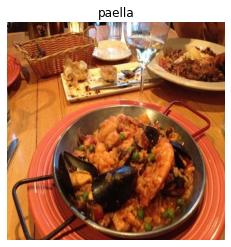

In [ ]:
# our image is in tensor format so now we will use matplotlib to plot ou image
import matplotlib.pyplot as plt
import tensorflow as tf
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

### Preprossing Data
As we can se above data we got have different shape, thus we have to preprocess out data to make it fit before making our CNN.
We'll be using tensorflow's effecentNet architecture(https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet) so it automatically rescale the images. Now we have to 
* Resize images
* Convert them from unit8 to float32

In [ ]:
def preprocess(image,label,image_size=224):
  image = tf.image.resize(image,size=[image_size,image_size])
  return tf.cast(image,tf.float32),label

In [ ]:
preprocess(image,label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[106.89285  , 126.147964 , 122.02041  ],
         [  4.2397847,  12.137743 ,  11.040805 ],
         [ 10.076534 ,  11.918371 ,  15.637758 ],
         ...,
         [107.305984 ,  43.30598  ,  16.305983 ],
         [116.99993  ,  52.999935 ,  27.999935 ],
         [108.581894 ,  44.58189  ,  19.581892 ]],
 
        [[119.13776  , 132.41837  , 130.0153   ],
         [ 24.5459   ,  29.239777 ,  29.964268 ],
         [ 15.612247 ,  13.158165 ,  16.285715 ],
         ...,
         [110.13274  ,  46.132732 ,  19.132734 ],
         [109.137726 ,  45.137726 ,  18.137728 ],
         [107.03052  ,  43.030518 ,  16.030518 ]],
 
        [[103.23979  , 108.94387  , 111.66325  ],
         [ 53.01529  ,  50.816307 ,  51.887737 ],
         [ 19.515308 ,   8.061225 ,   9.566327 ],
         ...,
         [112.84691  ,  47.846912 ,  19.418339 ],
         [112.64286  ,  47.642857 ,  19.214287 ],
         [109.16322  ,  44.163227 ,  15.734653

In [ ]:
train_data = train_data.map(map_func=preprocess,num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = valid_data.map(map_func=preprocess,num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, valid_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

### Creating callbacks for our model
In this section we'll make some usefull callbacks using tensorflow
Callbacks we are going to use are as follow and you can read more about then from the given link-
* Tensorboard callback (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard)
* Checkpoint callback (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
* Earlystopping callback (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [ ]:
import datetime
def tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" +experiment_name + "/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard callback at {log_dir}")
  return tensorboard_callback

In [ ]:
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0)

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,verbose=1)

### Creating our model
we'll start with a base model with EfficientNet's achitecture and the do some fecture extraction. Then further we'll use fine tuning to unfreez some of the layer's of the transfered model so that it's layers can train on our dataset too.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) 
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(train_data, 
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=int(0.15 * len(valid_data)),
                    callbacks=[tensorboard_callback("training_logs", 
                                                          "food101"),
                              model_checkpoint,
                              earlystopping_callback])

Saving tensorboard callback at training_logs/food101/20211015-114002
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 343s 129ms/step - loss: 1.8220 - accuracy: 0.5579 - val_loss: 1.2342 - val_accuracy: 0.6780
Epoch 2/3
2368/2368 [==============================] - 302s 126ms/step - loss: 1.2930 - accuracy: 0.6669 - val_loss: 1.1314 - val_accuracy: 0.6954
Epoch 3/3
2368/2368 [==============================] - 302s 126ms/step - loss: 1.1436 - accuracy: 0.7025 - val_loss: 1.0946 - val_accuracy: 0.7052


In [ ]:
model.evaluate(valid_data)

790/790 [==============================] - 94s 118ms/step - loss: 1.0926 - accuracy: 0.7067


[1.0925732851028442, 0.7067326903343201]

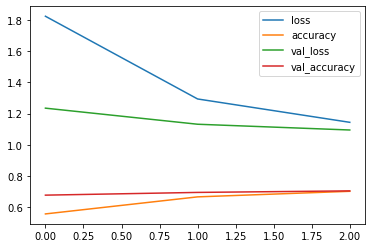

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot();

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.821994,0.557941,1.234234,0.677966
1,1.293003,0.666944,1.131411,0.695445
2,1.143646,0.702495,1.094568,0.705244


In [ ]:
import os
save_dir = "drive/MyDrive/CNN/food_vision/"
# os.makedirs(save_dir) # use this to make directory.
model.save(save_dir)

INFO:tensorflow:Assets written to: drive/MyDrive/CNN/food_vision/assets


INFO:tensorflow:Assets written to: drive/MyDrive/CNN/food_vision/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
loaded_model = tf.keras.models.load_model(save_dir);

In [ ]:
loaded_model.evaluate(valid_data)

790/790 [==============================] - 97s 120ms/step - loss: 1.0926 - accuracy: 0.7067


[1.092574119567871, 0.7067326903343201]

In [ ]:
for image,label in valid_data.take(1):
  pass

In [ ]:
image_preprocess = preprocess(image,label)

<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[3.68418388e+01, 1.18418369e+01, 3.28418388e+01],
         [3.85000000e+01, 1.35000010e+01, 3.25000000e+01],
         [4.02857132e+01, 1.32857151e+01, 3.02857132e+01],
         ...,
         [4.17857361e+01, 1.77857361e+01, 3.97857361e+01],
         [4.71888084e+01, 2.51888103e+01, 4.61888084e+01],
         [4.92856789e+01, 2.72856789e+01, 5.02856789e+01]],

        [[3.79081650e+01, 1.49081650e+01, 3.49081650e+01],
         [4.09234695e+01, 1.59234695e+01, 3.49234695e+01],
         [4.16428566e+01, 1.46428576e+01, 3.32142868e+01],
         ...,
         [4.34592247e+01, 2.14286156e+01, 4.24439201e+01],
         [4.99387894e+01, 2.81378078e+01, 4.90714684e+01],
         [5.31173820e+01, 3.41173820e+01, 5.41173820e+01]],

        [[4.45663300e+01, 1.95663280e+01, 4.05663300e+01],
         [4.75153084e+01, 2.20867348e+01, 4.26581650e+01],
         [4.46887779e+01, 1.75969391e+01, 3.62142868e+01],
         ...,
         [

In [ ]:
prob = loaded_model.predict(image_preprocess[0])

In [ ]:
prob[0].argmax()

22

In [ ]:
class_names[22]

'chocolate_mousse'